---
__About Section:__

- __Author name:__ UBAIDULLAH

- __Email:__ [ai.bussiness.student0@gmail.com](mailto:ai.bussiness.student0@gmail.com)

- __GitHub:__ [github.com/ubaid-X/](https://github.com/ubaid-X/)

- __LinkedIn Profile:__ [linkedin.com/in/ubaid-ullah-634563373/](https://www.linkedin.com/in/ubaid-ullah-634563373/)

- __Kaggle:__ [kaggle.com/ubaidullah01](https://www.kaggle.com/ubaidullah01)

---

> # __Statistical Analysis__

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [37]:
# loading Titanic Dataset
df = sns.load_dataset('titanic')

> # __1. Normal Distribution Test__

In [5]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<Axes: xlabel='age', ylabel='Count'>

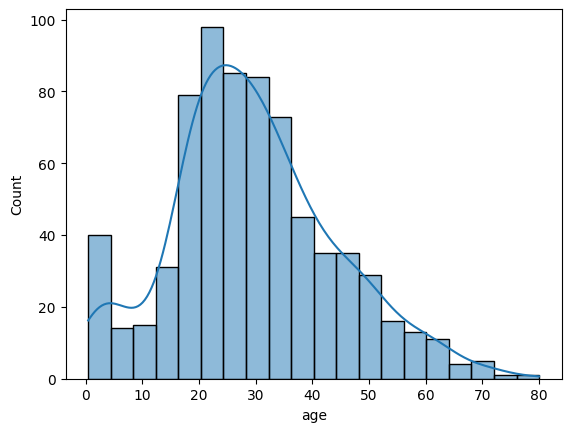

In [38]:
# Graphical Method
sns.histplot(data=df, x='age', kde=True)

<Axes: xlabel='age', ylabel='Count'>

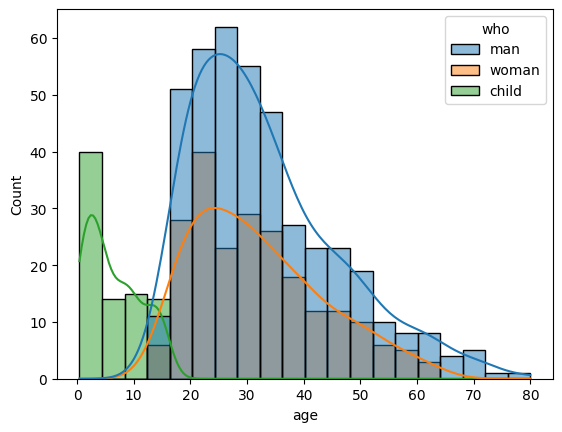

In [7]:
sns.histplot(data=df, x='age', hue='who', kde=True)

---
# __1.1 Shapiro wilk Test on normal distribution/Gaussian Distribution__

- __Null Hypothesis (H0):__ The Data is Normally Distributed
- __Altenative Hypothesis (H1):__ The Data is not normally Distributed

In [25]:
# cheking and droping null values
print(df['age'].isnull().sum())
age_data = df['age'].dropna().values

177


<Axes: ylabel='Count'>

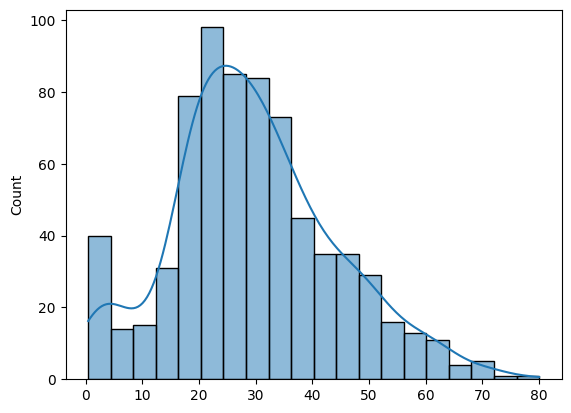

In [39]:
sns.histplot(x=age_data, kde=True)

> __If p-value is less than `0.05` so the H0 will be rejected and H1 will be correct vice versa__

In [ ]:
# Shapiro Wilk Test
statistic, p = stats.shapiro(age_data)

# Printing the result using if-else conditions
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject)')
else:
    print(f'p-value: {p}, Sample does not looks  Gaussian/Normally Distributed rejected the H0')

0.9814577414504954
p-value: 7.337348958673592e-08, Sample does not looks  Gaussian/Normally Distributed rejected the H0


---


<Axes: xlabel='fare', ylabel='Count'>

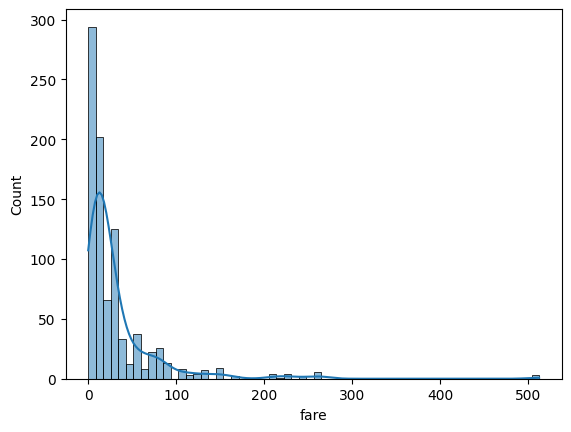

In [44]:
sns.histplot(data=df, x='fare', kde=True)

In [45]:
# Shapiro Wilk Test
statistic, p = stats.shapiro(df['fare'])

# Printing the result using if-else conditions
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject)')
else:
    print(f'p-value: {p}, Sample does not looks  Gaussian/Normally Distributed rejected the H0')

p-value: 1.0840444395829658e-43, Sample does not looks  Gaussian/Normally Distributed rejected the H0


---

# __1.2 Kolmogorov-Smirnov Test on normal distribution/Gaussian Distribution__
- __Null Hypothesis (H0):__ The Data is Normally Distributed
- __Altenative Hypothesis (H1):__ The Data is not normally Distributed 

In [47]:
# Kolmogorov-Smirnov Test
statistic, p = stats.kstest(age_data, 'norm')

# Printing the result using if-else conditions
if p > 0.05:
    print(f'p-value: {p}, Sample looks Gaussian/Normally Distributed (fail to reject)')
else:
    print(f'p-value: {p}, Sample does not looks  Gaussian/Normally Distributed rejected the H0')

p-value: 0.0, Sample does not looks  Gaussian/Normally Distributed rejected the H0


---
# __1.3 Anderson-Darling Test on normal distribution/Gaussian Distribution__
- __Null Hypothesis (H0):__ The Data is Normally Distributed
- __Altenative Hypothesis (H1):__ The Data is not normally Distributed

In [49]:
# Anderson-Darling Test
result = stats.anderson(age_data, dist='norm')

# Printing the result using if-else conditions
print(f"Statistic: {result.statistic}")
for i in range(len(result.critical_values)):
    sig_level = result.significance_level[i]
    crit_value = result.critical_values[i]
    if result.statistic < crit_value:
        print(f"At {sig_level}% significance level: Sample looks Gaussian/Normally Distributed (fail to reject H0)")
    else:
        print(f"At {sig_level}% significance level: Sample does not look Gaussian/Normally Distributed (reject H0)")  

Statistic: 3.8230373853616584
At 15.0% significance level: Sample does not look Gaussian/Normally Distributed (reject H0)
At 10.0% significance level: Sample does not look Gaussian/Normally Distributed (reject H0)
At 5.0% significance level: Sample does not look Gaussian/Normally Distributed (reject H0)
At 2.5% significance level: Sample does not look Gaussian/Normally Distributed (reject H0)
At 1.0% significance level: Sample does not look Gaussian/Normally Distributed (reject H0)


---
# __1.4 Q-Q Plot (Quantile-Quantile Plot)__
- __Null Hypothesis (H0):__ The Data is Normally Distributed
- __Altenative Hypothesis (H1):__ The Data is not normally Distributed

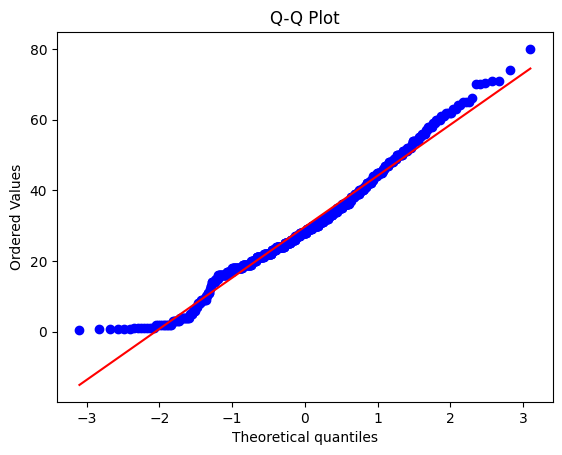

In [50]:
# Q-Q Plot (Quantile-Quantile Plot)
stats.probplot(age_data, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()
# If the points closely follow the reference line, it suggests that the data is normally distributed. If there are significant deviations from the line, it indicates departures from normality.


__So it is not normally distributed because the tailed and upper arrow is skewed...__

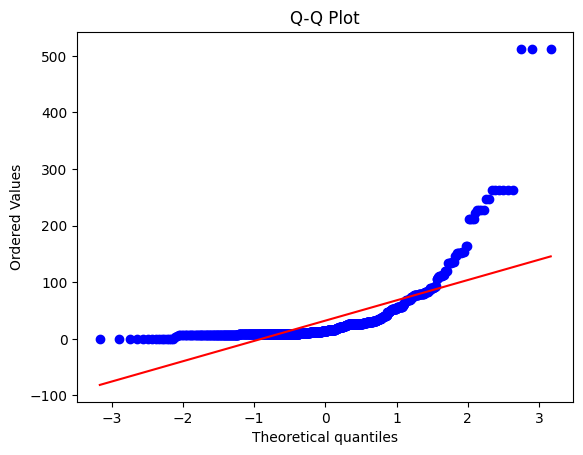

In [51]:
# Q-Q Plot (Quantile-Quantile Plot)
stats.probplot(df['fare'], dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()
# If the points closely follow the reference line, it suggests that the data is normally distributed. If there are significant deviations from the line, it indicates departures from normality.


__it is also not normall distributed__

---

> # __Now Tests on Normally Distributed Data sample__

<Axes: ylabel='Count'>

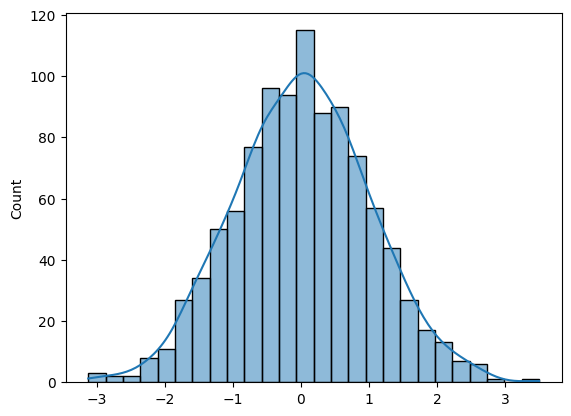

In [53]:
# sample of normal Distribution data
sample = np.random.normal(loc=0, scale=1, size=1000)

sns.histplot(x=sample, kde=True)

---
__1. Shapiro Test__

In [54]:
statistic, p = stats.shapiro(sample)

if p > 0.05:
    print(f'p-vale: {p} and the Data is Normally Distributed')
else:
    print(f'p-vale: {p} and the Data is not Normally Distributed')

p-vale: 0.997047943314638 and the Data is Normally Distributed


---
__2. Kolmogorov-Smirnov Test__

In [55]:
statistic, p = stats.kstest(sample, 'norm')

if p > 0.05:
    print(f'p-vale: {p} and the Data is Normally Distributed')
else:
    print(f'p-vale: {p} and the Data is not Normally Distributed')

p-vale: 0.8047096040857937 and the Data is Normally Distributed


---
__3. Anderson-Darling Test__

In [57]:
result= stats.anderson(sample, dist='norm')
print(f"Statistic: {result.statistic}")
for i in range(len(result.critical_values)):
    sig_level = result.significance_level[i]
    crit_value = result.critical_values[i]
    if result.statistic < crit_value:
        print(f"At {sig_level}% significance level: Sample looks Gaussian/Normally Distributed (fail to reject H0)")
    else:
        print(f"At {sig_level}% significance level: Sample does not look Gaussian/Normally Distributed (reject H0)")

Statistic: 0.11388484277688349
At 15.0% significance level: Sample looks Gaussian/Normally Distributed (fail to reject H0)
At 10.0% significance level: Sample looks Gaussian/Normally Distributed (fail to reject H0)
At 5.0% significance level: Sample looks Gaussian/Normally Distributed (fail to reject H0)
At 2.5% significance level: Sample looks Gaussian/Normally Distributed (fail to reject H0)
At 1.0% significance level: Sample looks Gaussian/Normally Distributed (fail to reject H0)


---

__4. Q-Q Plot (Quantile-Quantile Plot)__

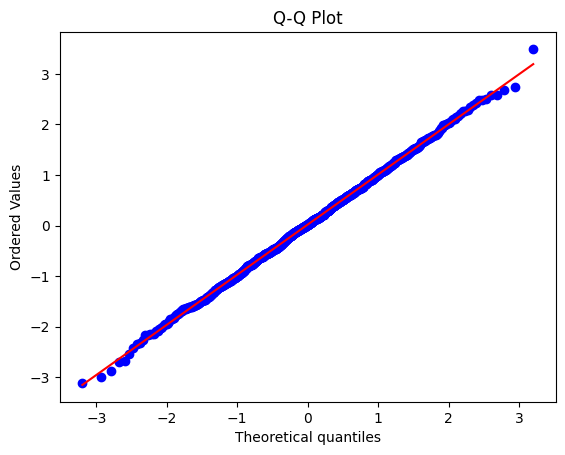

In [58]:
stats.probplot(sample, dist="norm", plot=plt)
plt.title("Q-Q Plot")
plt.show()
# If the points closely follow the reference line, it suggests that the data is normally distributed. If there are significant deviations from the line, it indicates departures from normality.

__Now This sample is perfectly Normally distributed__

---

> # ___2. Test of Homogeneity___

# 2.1 Levene's Test

In [62]:
# sample data
team1 = [3.1, 4.5, 5.6, 7.8, 8.9]
team2 = [1.3, 3.4, 4.5, 5.6, 6.7]

# Applying the Levene's Test
w_stat, p_val = stats.levene(team1, team2)

print(f'w-statistics: {w_stat}')
print(f'p-value: {p_val}')

# Print the result using if-else conditions
if p_val > 0.05:
    print(f"p-value: {p_val}, Variances are equal (fail to reject H0)")
else:
    print(f"p-value: {p_val}, Variances are not equal (reject H0)")

w-statistics: 0.1431297709923662
p-value: 0.7150310147444894
p-value: 0.7150310147444894, Variances are equal (fail to reject H0)


---
# 2.2 Bartlett's Test

In [64]:
# sample data
team1 = [3.1, 4.5, 5.6, 7.8, 8.9]
team2 = [1.3, 3.4, 4.5, 5.6, 6.7]

# Applying the Bartlett's Test
t_stat, p_val = stats.bartlett(team1, team2)

print(f't-statistics: {t_stat}')
print(f'p-value: {p_val}')

# Print the result using if-else conditions
if p_val > 0.05:
    print(f"p-value: {p_val}, Variances are equal (fail to reject H0)")
else:
    print(f"p-value: {p_val}, Variances are not equal (reject H0)")

t-statistics: 0.06055893436776058
p-value: 0.8056146930581808
p-value: 0.8056146930581808, Variances are equal (fail to reject H0)


---

![test22](./math_pics/test22.png)

---


> # 3. Chi-Squared Test

> Chi-Squared Test is for only Categorical Data

In [65]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


- __Null Hypothesis (H0):__ There is no significant association between gender('sex') and servival on the Titanic.This means any observed differences in survival rates between genders in the dataset are due to chance and not due to an underlying relationship.

- __Alternative Hypothesis (H1):__ There is a significant association between gender ('sex') and survival ('survived') on the titanic. This implies that the differneces in survival rates are not just due to chance but are influenced by the passenger's gender

In [67]:
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [69]:
# Create contingency table
contingency_table = pd.crosstab(df['sex'], df['survived'])
contingency_table

survived,0,1
sex,,
female,81,233
male,468,109


In [72]:
# perform the Chi-Square Test

chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

# print the results
print(f'Chi-Square statistic: {chi2}')
print(f'p-value: {p}')
print(f'Degree of freedom: {dof}')
print(f'Expected: {expected}')

Chi-Square statistic: 260.71702016732104
p-value: 1.1973570627755645e-58
Degree of freedom: 1
Expected: [[193.47474747 120.52525253]
 [355.52525253 221.47474747]]


As the p_value in this test is __P-value:__ `1.1973570627755645e-58` which is far less than the `0.05`, so we reject the __Null Hypothesis__

---

> # __4. T-Test / Student T-Test__

> If the values of sample is less than 30 than we can perform t-test or student t-test `< 30`.

# 4.1 One-Sample T-test

In [74]:
# sample data
x = [1, 2, 3, 4, 5]

# Known population Mean
mu = 3

# perform one sample t-test
t_statistic, p = stats.ttest_1samp(x, mu)

# print results
print(f't-statistic: {t_statistic}')
print(f'p-value: {p}')

# printing result using the if-else condition
if p > 0.05:
    print(f'p-value: {p}, Sample mean is equal to the population mean (fail to reject)')
else:
    print(f'p-value: {p}, Sample mean is not equal to population mean (H0 rejected )')

t-statistic: 0.0
p-value: 1.0
p-value: 1.0, Sample mean is equal to the population mean (fail to reject)


In [76]:
# sample data
x = [1, 2, 3, 4, 5]

# Known population Mean
mu = 6

# perform one sample t-test
t_statistic, p = stats.ttest_1samp(x, mu)

# print results
print(f't-statistic: {t_statistic}')
print(f'p-value: {p}')

# printing result using the if-else condition
if p > 0.05:
    print(f'p-value: {p}, Sample mean is equal to the population mean (fail to reject)')
else:
    print(f'p-value: {p}, Sample mean is not equal to population mean (H0 rejected )')

t-statistic: -4.242640687119285
p-value: 0.013235599563682695
p-value: 0.013235599563682695, Sample mean is not equal to population mean (H0 rejected )


---
# 4.2 Two Sample T-test (independent)

In [79]:
# sample data
team1 = [3.1, 4.5, 5.6, 7.8, 8.9]
team2 = [1.3, 3.4, 4.5, 5.6, 6.7]

# perform independant two-sample t-test
t_stat, p_val = stats.ttest_ind(team1, team2)

print(f't-statistic: {t_stat}')
print(f'p-value: {p_val}')

if p > 0.05:
    print(f'p-value: {p_val}, team1 mean is equal to team2 mean (fail to reject)')
else:
    print(f'p-value: {p_val}, team1 mean is not equal to team2 mean (H0 rejected)')

t-statistic: 1.1913994752879298
p-value: 0.26764100938059676
p-value: 0.26764100938059676, team1 mean is not equal to team2 mean (H0 rejected)


---
# 4.3 Paired Sample t-test

In [80]:
# sample data
before = [2, 3, 4, 5, 6]
after = [3, 4, 5, 6, 7]

# perform paired sample t-test
t_stat, p = stats.ttest_rel(before, after)

print(f't-statistic: {t_stat}')
print(f'p-value: {p}')

if p > 0.05:
    print(f'p-value: {p_val}, before mean is equal to after mean (fail to reject H0)')
else:
    print(f'p-value: {p_val}, before mean is not equal to after mean (H0 rejected)')

t-statistic: -inf
p-value: 0.0
p-value: 0.26764100938059676, before mean is not equal to after mean (H0 rejected)


c:\Users\Computer Valley\.conda\envs\DS_Env\Lib\site-packages\scipy\stats\_axis_nan_policy.py:423: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return hypotest_fun_in(*args, **kwds)


---

> # __5. ANOVA__
Analysis of Variance

# 5.1 One-way ANOVA

In [81]:
# sample data
a = [2.3, 3.4, 4.5, 1.4, 5.2]
b = [12.5, 13.6, 14.7, 11.6, 15.4]
c = [22.7, 23.8, 24.9, 21.8, 25.6]

# perform one-way ANOVA
f_stat, p_val = stats.f_oneway(a, b, c)

# printing the result base on if else condition
if p_val > 0.05:
    print(f'p-value: {p_val}, Means are equal (fail to reject H0)')
else:
    print(f'p-value: {p_val}, Means are not equal (rejected H0)')

p-value: 3.941826860079641e-10, Means are not equal (rejected H0)
